### Supermarket sales analysis

1. Load datasets
2. Explore datasets
3. Data cleaning
4. Data visualization
5. Conclusion

#### 1. Load datasets

In [2]:
#first import all necessaries libraries which are used for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the datasets
df = pd.read_csv("../datasets/supermarket_sales.csv")

#display first five rows 
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### 2. Explore datasets

In [4]:
#overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#summary of statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
#check columns names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
#checking for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#display last five rows
df.tail()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [9]:
# it gives the shape (number of rows) of datasets
df.shape

(1000, 17)

#### 3. Data preprocessing and cleaning

In [10]:
#display to view first 10 values in date column
df["Date"].head(10)

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
5    3/25/2019
6    2/25/2019
7    2/24/2019
8    1/10/2019
9    2/20/2019
Name: Date, dtype: object

In [11]:
#after that covert it to proper date format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [12]:
#once again display 5 value to check whether it converted or not in date format
df["Date"].head(5)

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [13]:
#Time column is stored as a string, convert it to datetime
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.time

In [14]:
#check whether it is converted or not
df["Time"].head(5)

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: Time, dtype: object

In [15]:
#Check for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [16]:
#Checking column names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [17]:
# Drop the "Invoice ID" column as it is not needed for analysis
df.drop(columns=["Invoice ID", "Tax 5%", "cogs", "gross margin percentage"], inplace=True) 

In [18]:
#checking all those column(Invoice ID, Tax 5%, cogs, gross margin percentage) are dropped or not
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment',
       'gross income', 'Rating'],
      dtype='object')

#### 4. data visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4864\1320895414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Branch', y='Total', palette='Blues_r')


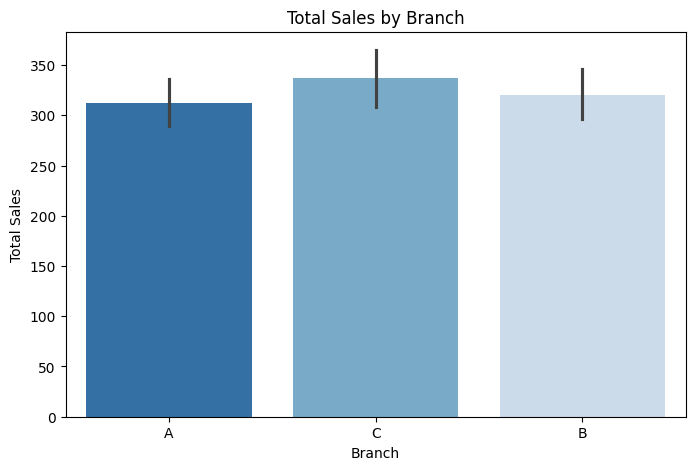

In [ ]:
#Plot total sales per branch to visualize the top-performing branch
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Branch', y='Total', palette='Blues_r')

plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()

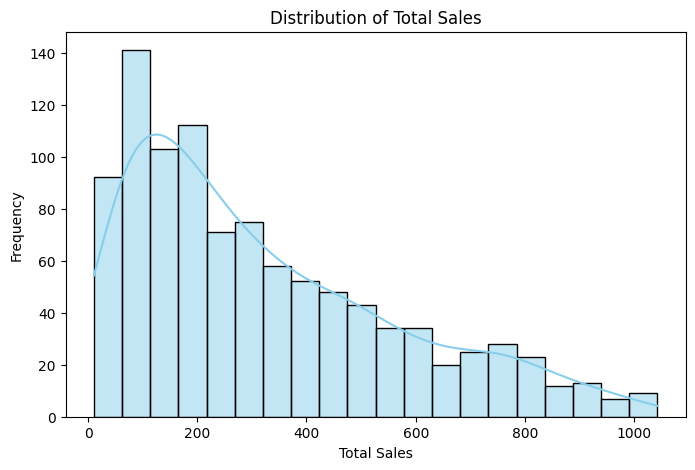

In [ ]:
# Histogram to show the distribution of total sales values, highlighting frequency across different sales ranges.
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], bins=20, kde=True, color='skyblue') 

plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

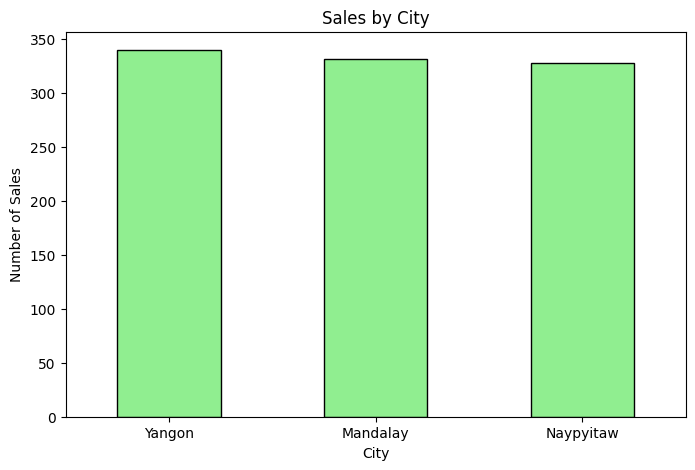

In [ ]:
# This plot shows the number of sales in each city, highlighting which city has the most sales.
# the city yangon have higher number of sales as compared to mandalay andnaypyitaw
city_sales = df['City'].value_counts()
plt.figure(figsize=(8, 5))
city_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Number of Sales")
plt.xticks(rotation=0) 
plt.show()

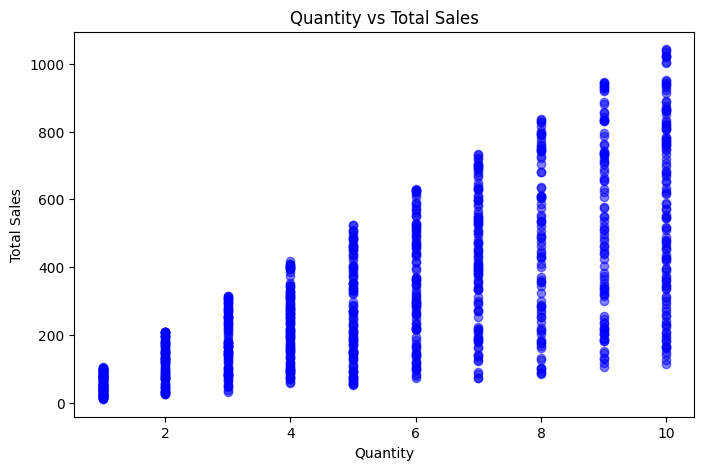

In [32]:
# Scatter plot showing the relationship between quantity and total sales
plt.figure(figsize=(8, 5))
plt.scatter(df['Quantity'], df['Total'], alpha=0.5, color='blue')
plt.title("Quantity vs Total Sales")
plt.xlabel("Quantity")
plt.ylabel("Total Sales")
plt.show()

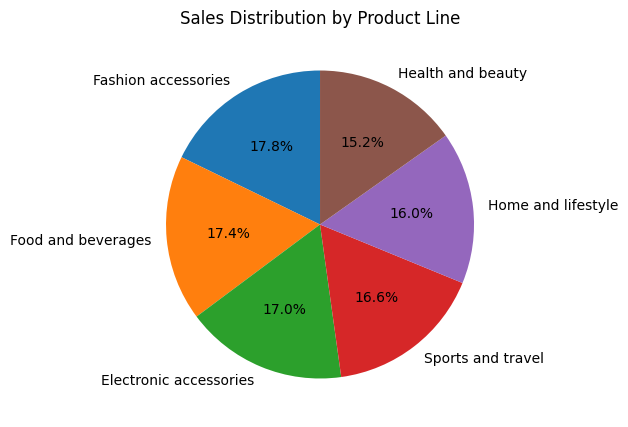

In [ ]:
#Pie chart showing sales distribution by product line with percentage of total sales.
product_line_counts = df['Product line'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(product_line_counts, labels=product_line_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Sales Distribution by Product Line")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4864\3871191672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment', y='Total', data=df, palette='Set2')


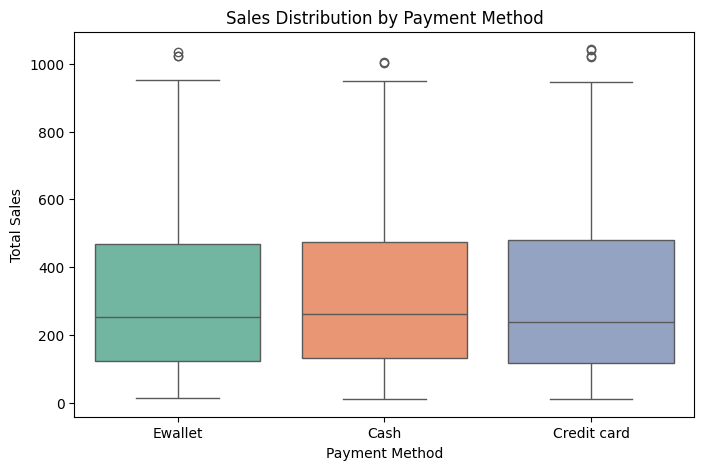

In [37]:
# Box plot showing Total Sales distribution by Payment Method
plt.figure(figsize=(8, 5))
sns.boxplot(x='Payment', y='Total', data=df, palette='Set2')

plt.title("Sales Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
#checking which payment is used more
payment_counts = df['Payment'].value_counts()
print(payment_counts)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [35]:
## Provides summary statistics of the numerical columns in the DataFrame.
df.describe()

,Unit price,Quantity,Total,Date,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,15.379369,6.97270
min,10.080000,1.000000,10.678500,2019-01-01 00:00:00,0.508500,4.00000
25%,32.875000,3.000000,124.422375,2019-01-24 00:00:00,5.924875,5.50000
50%,55.230000,5.000000,253.848000,2019-02-13 00:00:00,12.088000,7.00000
75%,77.935000,8.000000,471.350250,2019-03-08 00:00:00,22.445250,8.50000
max,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,49.650000,10.00000
std,26.494628,2.923431,245.885335,NaN,11.708825,1.71858


In [36]:
# Sorts by "Rating" and selects the top 10 highest-rated products.
top_ten_rating = df.sort_values("Rating", ascending=False).head(10)
top_ten_rating

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,gross income,Rating
62,B,Mandalay,Member,Female,Sports and travel,55.07,9,520.4115,2019-02-03,13:40:00,Ewallet,24.7815,10.0
853,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,554.2950,2019-02-25,11:58:00,Ewallet,26.3950,10.0
159,B,Mandalay,Normal,Male,Sports and travel,93.39,6,588.3570,2019-03-27,19:18:00,Ewallet,28.0170,10.0
60,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,77.9310,2019-02-15,17:47:00,Credit card,3.7110,10.0
387,A,Yangon,Normal,Female,Health and beauty,32.32,10,339.3600,2019-02-20,16:49:00,Credit card,16.1600,10.0
873,A,Yangon,Member,Male,Sports and travel,89.06,6,561.0780,2019-01-18,17:26:00,Cash,26.7180,9.9
370,B,Mandalay,Member,Female,Electronic accessories,26.26,7,193.0110,2019-02-02,19:40:00,Cash,9.1910,9.9
86,C,Naypyitaw,Normal,Male,Fashion accessories,76.52,5,401.7300,2019-03-25,10:23:00,Cash,19.1300,9.9
651,B,Mandalay,Normal,Female,Health and beauty,55.81,6,351.6030,2019-01-22,11:52:00,Cash,16.7430,9.9
23,A,Yangon,Normal,Male,Electronic accessories,34.56,5,181.4400,2019-02-17,11:15:00,Ewallet,8.6400,9.9


### 5. Conclusion

- The bar plot shows that branch C leads in total sales, making it the top performer. The other branches(A and B)  have comparatively lower sales.
- The histogram shows that most sales are on the lower end, with fewer high-value transactions. This suggests that smaller purchases are more common, while larger purchases are less frequent.
- The bar plot shows that Yangon has more sales than Mandalay and Naypyitaw. This means Yangon has the highest number of sales among the three cities.
- The scatter plot should show a positive correlation, where higher quantities generally lead to higher total sales.
The pie chart shows how sales are spread across different product lines. It helps us see which product lines have the highest and lowest sales.
- The box plot shows the distribution of total sales for each payment method. Ewallet is the most commonly used payment method, with a wide range of sales values.